Table of Contents:
1. Importing Libraries
2. Setting path variable and Loading Data
3. Classify age as: 18-35 36-50 51-65 66-81 
4. Categorize Income as Low, Middle and High <65000, 65000-125000, >125000 
5. Merge with department data
6. set dependants flag
7. Family profiling: marital_status, age, dependants
8. Exporting data
9. Distribution of family_profile
10. Family profile by region
11. Comparing family_profile in different departments - crosstab created 
12. Income group distribution
13. Answers to key Questions

1. Importing Libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Setting path variable and Loading Dat

In [3]:
# setting path variable as root
path = r'C:\Users\shrut\Downloads\Task_data_analytics\Instacart Basket Analysis' 

In [4]:
# load data
df_high_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_cutomers.pkl')) 

In [14]:
df_high_activity['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

3. Classify age as: 18-35 36-50 51-65 66-81 

In [7]:
df_high_activity.loc[(df_high_activity['age'] >= 18) & (df_high_activity['age'] <= 35), 'age_group'] = '18-35'

C:\Users\shrut\AppData\Local\Temp\ipykernel_21316\600592073.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18-35' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[(df_high_activity['age'] >= 18) & (df_high_activity['age'] <= 35), 'age_group'] = '18-35'


In [8]:
df_high_activity.loc[(df_high_activity['age'] > 35) & (df_high_activity['age'] <= 50), 'age_group'] = '36-50'

In [9]:
df_high_activity.loc[(df_high_activity['age'] > 50) & (df_high_activity['age'] <= 65), 'age_group'] = '51-65'

In [10]:
df_high_activity.loc[(df_high_activity['age'] > 65) & (df_high_activity['age'] <= 81), 'age_group'] = '66-81'

In [12]:
df_high_activity['age_group'].value_counts(dropna = False)

age_group
18-35    8746779
66-81    7737619
36-50    7284522
51-65    7223744
Name: count, dtype: int64

In [13]:
df_high_activity.shape

(30992664, 32)

    # sum adds up to the same as row count

4. Categorize Income as Low, Middle and High <65000, 65000-125000, >125000

In [15]:
df_high_activity['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
df_high_activity['income'].head()

0    40423
1    40423
2    40423
3    40423
4    40423
Name: income, dtype: int64

In [18]:
df_high_activity.loc[(df_high_activity['income'] < 65000) , 'income_group'] = 'Low Income'

C:\Users\shrut\AppData\Local\Temp\ipykernel_21316\4234035926.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[(df_high_activity['income'] < 65000) , 'income_group'] = 'Low Income'


In [19]:
df_high_activity.loc[(df_high_activity['income'] >= 65000) & (df_high_activity['income'] < 125000) , 'income_group'] = 'Middle Income'

In [20]:
df_high_activity.loc[(df_high_activity['income'] >= 125000) , 'income_group'] = 'High Income'

In [22]:
df_high_activity['income_group'].value_counts(dropna = False)

income_group
Middle Income    15593185
High Income       8285217
Low Income        7114262
Name: count, dtype: int64

In [61]:
df_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30992664 entries, 0 to 30992663
Data columns (total 36 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int32  
 1   user_id                    int32  
 2   order_number               int8   
 3   orders_day_of_week         int8   
 4   order_hour_of_day          int8   
 5   days_since_previous_order  float16
 6   product_id                 int32  
 7   add_to_cart_order          int32  
 8   reordered                  int8   
 9   product_name               object 
 10  aisle_id                   int8   
 11  department_id              int8   
 12  prices                     float64
 13  busiest_day                object 
 14  busiest_days               object 
 15  busiest_period_of_day      object 
 16  max_order                  int8   
 17  loyalty_flag               object 
 18  mean_price                 float64
 19  spend_flag                 object 
 20  

5. Merge with department data

In [26]:
# load data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv')) 

In [28]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [29]:
# Renaming Unnamed:'department_id'
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [30]:
# Merging the final data set with all the changes made with the departments file
df_high_activity = df_high_activity.merge(df_dept, on = 'department_id')

In [33]:
df_high_activity['marital_status'].value_counts(dropna= False)

marital_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

6. set dependants flag

In [24]:
df_high_activity['num_of_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependants, dtype: float64

In [34]:
df_high_activity.loc[df_high_activity['num_of_dependants'] == 0, 'dependants_group'] = 'No dependants'

C:\Users\shrut\AppData\Local\Temp\ipykernel_21316\439925084.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[df_high_activity['num_of_dependants'] == 0, 'dependants_group'] = 'No dependants'


In [35]:
df_high_activity.loc[df_high_activity['num_of_dependants'] > 0, 'dependants_group'] = 'Has dependants'

In [36]:
df_high_activity['num_of_dependants'].value_counts(dropna = False)

num_of_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [37]:
df_high_activity['dependants_group'].value_counts(dropna = False)

dependants_group
Has dependants    23245632
No dependants      7747032
Name: count, dtype: int64

7. Family profiling: marital_status, age, dependants

single young with dependants
single young without dependants

married young with dependants
married young without dependants

single middle-age with dependants
single middle-age without dependants

married middle-age with dependants
married middle-age without dependants



In [38]:
# Family profile
df_high_activity.loc[(df_high_activity['marital_status'] == 'single') & (df_high_activity['dependants_group'] == 'Has dependants') & (df_high_activity['age_group'] == '18-35'), 'family_profile'] = 'single young, with dependants'

C:\Users\shrut\AppData\Local\Temp\ipykernel_21316\3465262255.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'single young, with dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[(df_high_activity['marital_status'] == 'single') & (df_high_activity['dependants_group'] == 'Has dependants') & (df_high_activity['age_group'] == '18-35'), 'family_profile'] = 'single young, with dependants'


In [39]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'single') & (df_high_activity['dependants_group'] == 'No dependants') & (df_high_activity['age_group'] == '18-35'), 'family_profile'] = 'single young, without dependants'

In [40]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'married') & (df_high_activity['dependants_group'] == 'Has dependants') & (df_high_activity['age_group'] == '18-35'), 'family_profile'] = 'married young, with dependants'

In [41]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'married') & (df_high_activity['dependants_group'] == 'No dependants') & (df_high_activity['age_group'] == '18-35'), 'family_profile'] = 'married young, without dependants'

In [42]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'single') & (df_high_activity['dependants_group'] == 'Has dependants') & (df_high_activity['age_group'] == '36-50'), 'family_profile'] = 'single middle aged, with dependants'

In [43]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'single') & (df_high_activity['dependants_group'] == 'No dependants') & (df_high_activity['age_group'] == '36-50'), 'family_profile'] = 'single middle aged, without dependants'

In [44]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'married') & (df_high_activity['dependants_group'] == 'Has dependants') & (df_high_activity['age_group'] == '36-50'), 'family_profile'] = 'married middle aged, with dependants'

In [45]:
df_high_activity.loc[(df_high_activity['marital_status'] == 'married') & (df_high_activity['dependants_group'] == 'No dependants') & (df_high_activity['age_group'] == '36-50'), 'family_profile'] = 'married middle aged, without dependants'

In [46]:
df_high_activity['family_profile'].value_counts(dropna = False)

family_profile
NaN                                       16443974
married middle aged, with dependants       5481096
married young, with dependants             5084446
single young, without dependants           2179722
single middle aged, without dependants     1803426
Name: count, dtype: int64

8. Exporting data

In [47]:
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_final.pkl'))

9. Distribution of family_profile

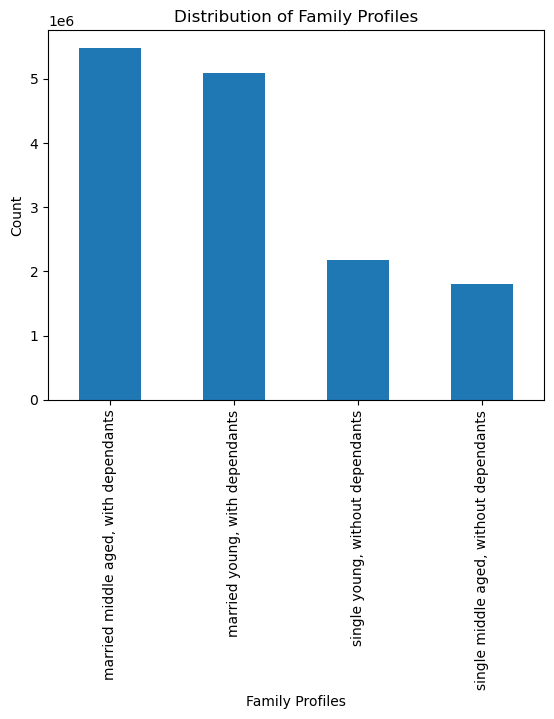

In [49]:
family_profile_bar = df_high_activity['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [51]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_bar
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_distribution.png'))

In [52]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = df_high_activity.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [53]:
family_profile_agg

order_id prices                    
                                          count    min       mean      max
family_profile                                                            
married middle aged, with dependants    5481096    1.0  11.188087  99999.0
married young, with dependants          5084446    1.0  11.917226  99999.0
single middle aged, without dependants  1803426    1.0  12.575634  99999.0
single young, without dependants        2179722    1.0  11.814380  99999.0

10. Family profile by region

In [57]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df_high_activity['family_profile'],df_high_activity['region'], dropna = True)

In [58]:
fam_region_profile

region,MidWest,NorthEast,South,West
family_profile,,,,
"married middle aged, with dependants",1307770,964763,1812514,1396049
"married young, with dependants",1176448,898528,1702563,1306907
"single middle aged, without dependants",444085,291744,605944,461653
"single young, without dependants",492057,397762,744667,545236


Text(0, 0.5, 'Count')

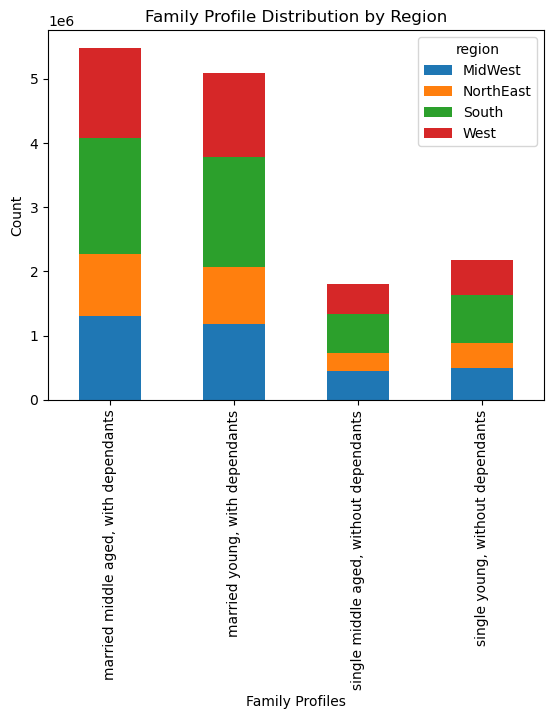

In [98]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True)

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')

In [72]:
# Save the figure
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_distribution.png'))

11. Comparing family_profile in different departments - crosstab created 

In [64]:
fam_departments_profile = pd.crosstab(df_high_activity['department'],df_high_activity['family_profile'], dropna = True)

<Figure size 1000x1200 with 0 Axes>

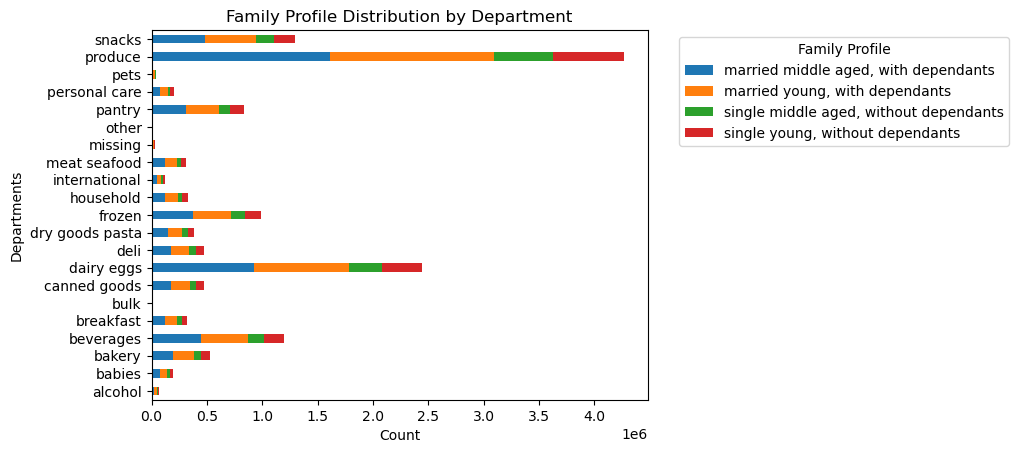

In [71]:
plt.figure(figsize=(10, 12))  
fam_departments_profile.plot.barh(stacked=True)

plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_departments_profile.png'))

#it seems married middle aged with dependants are main customers followed by married young with dependants.
Mostly consumed is produce and dairy eggs.

12. Income group distribution

In [68]:
income_group_distribution_agg = df_high_activity.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

Text(0, 0.5, 'Count')

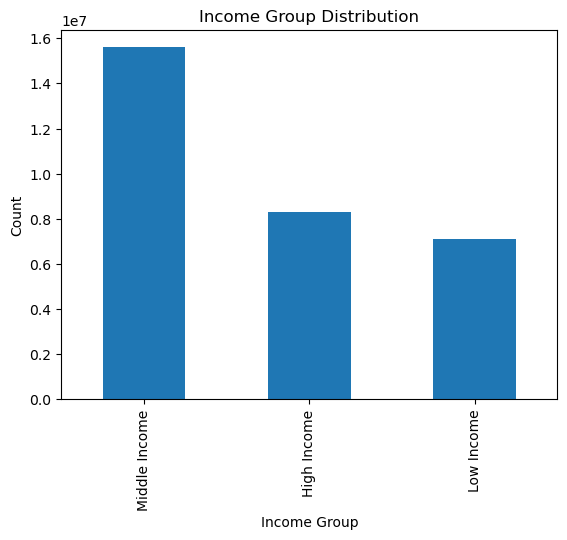

In [69]:
income_group_distribution = df_high_activity['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [70]:
# save plot
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group_distribution.png'))

In [74]:
#income by department-crosstab
income_group_department = pd.crosstab(df_high_activity['department'],df_high_activity['income_group'], dropna = False) 

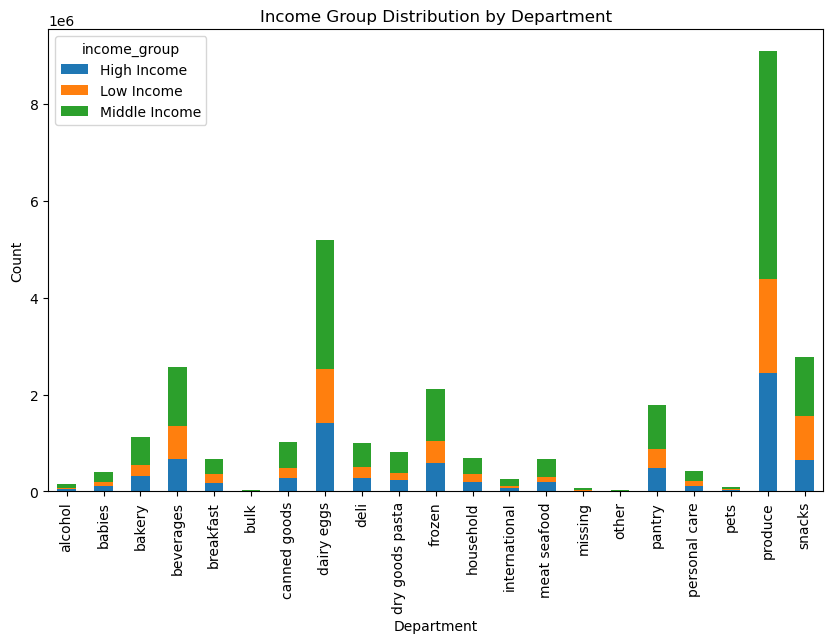

In [75]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()

    # middle income are main consumers

In [76]:
# save figure
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group_department.png'))

In [78]:
#income by region
income_group_region = pd.crosstab(df_high_activity['income_group'],df_high_activity['region'], dropna = False)

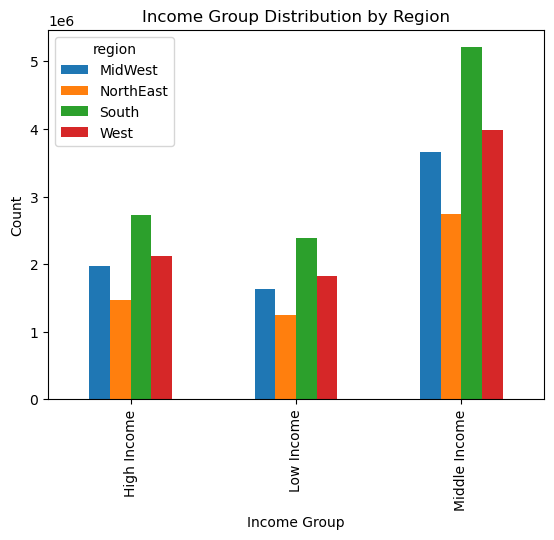

In [79]:
income_group_region_bar = income_group_region.plot(kind='bar')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [80]:
#save figure
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group_region.png'))

13. Answers to key Questions

    	# 1. Busiest days of week and hours of the day

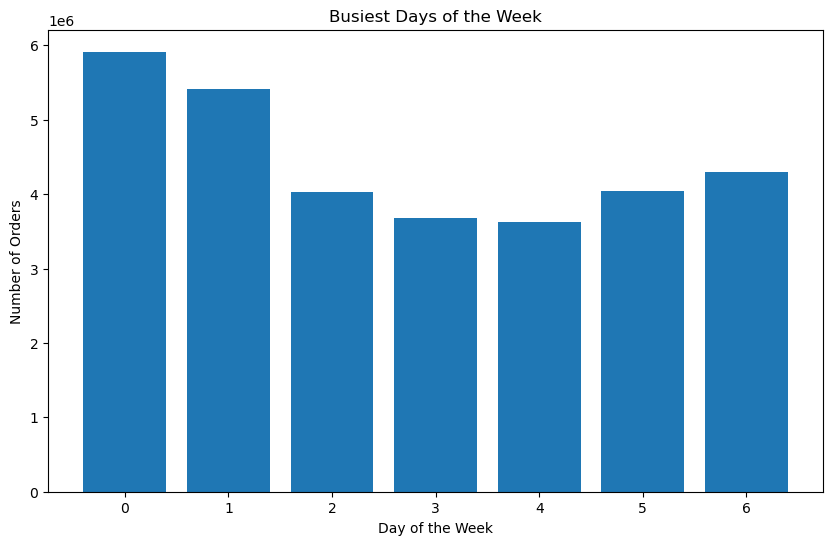

In [82]:
busiest_week_days_bar = df_high_activity['orders_day_of_week'].value_counts()
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busiest_week_days.png'))
# Show the plot
plt.show()

Text(0, 0.5, 'Number of Orders')

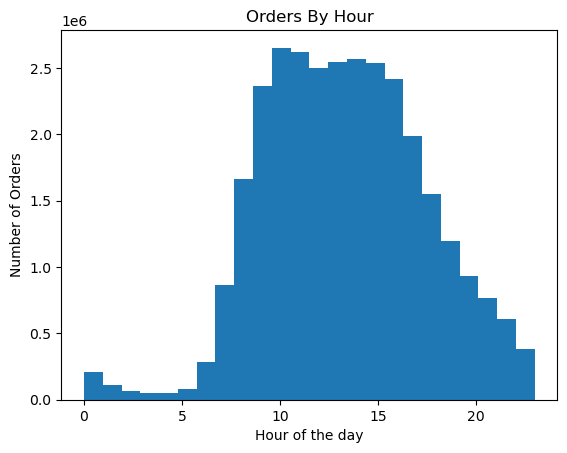

In [85]:
hist_order_hour_of_day = df_high_activity['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')

In [86]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

    # Departments frequency

Text(0.5, 1.0, 'Orders by Department')

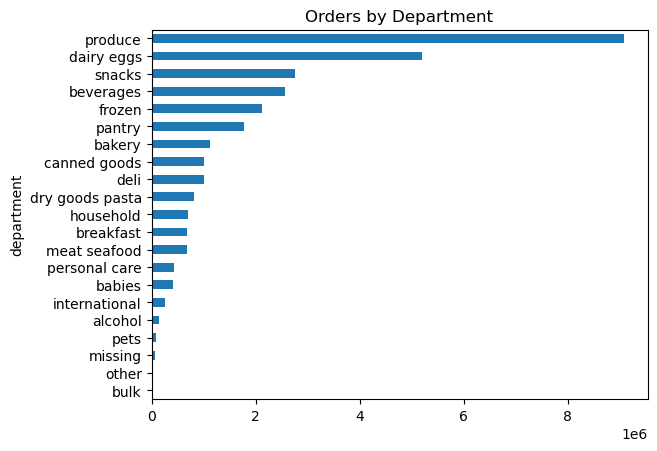

In [87]:
department_frequency = df_high_activity['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [88]:
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'))

    # Brand Loyalty

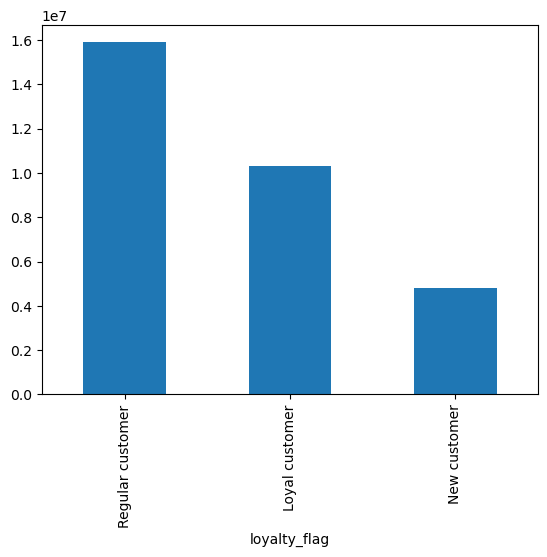

In [89]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df_high_activity['loyalty_flag'].value_counts().plot.bar()

In [92]:
loyalty_flag_departments = pd.crosstab(df_high_activity['department'],df_high_activity['loyalty_flag'], dropna = False)

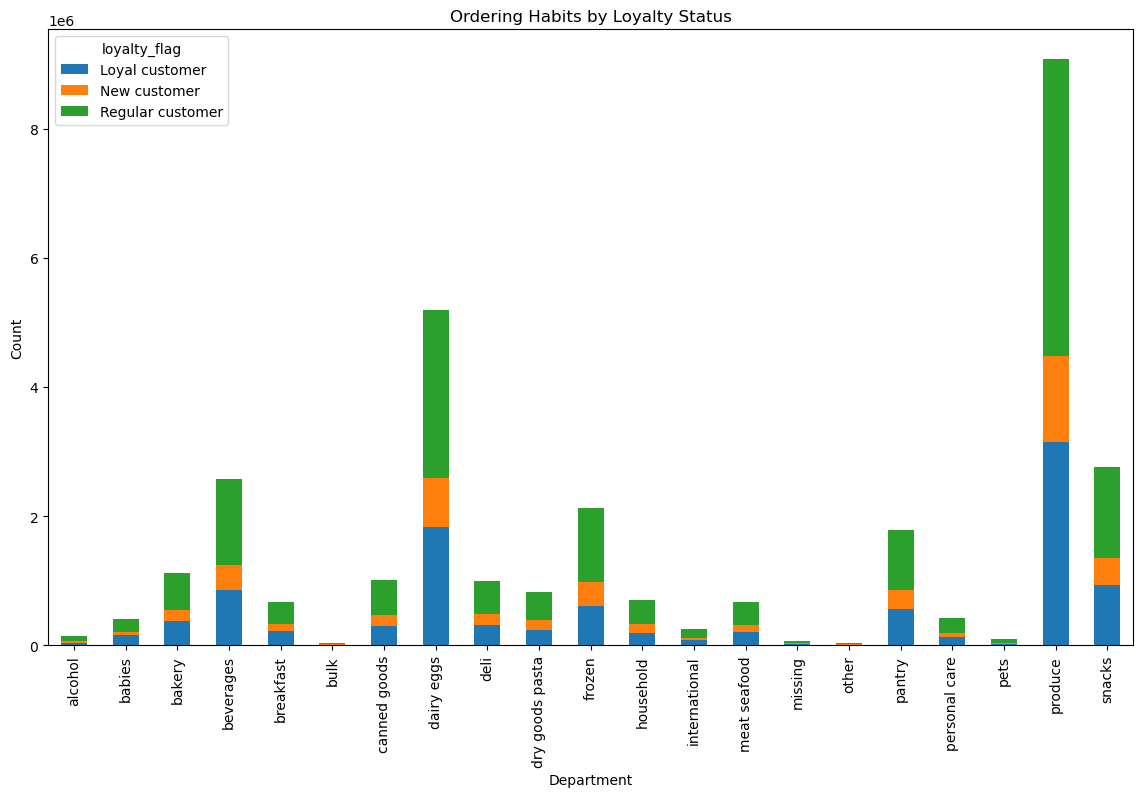

In [93]:
# Create a stacked bar chart
loyalty_flag_departments.plot(kind='bar', stacked=True, figsize=(14, 8))

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_departments.png'))

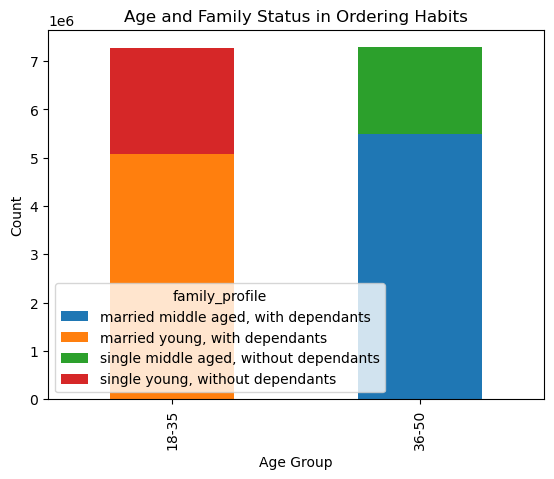

In [100]:
# Creating a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df_high_activity['age_group'], df_high_activity['family_profile'], dropna=True)
# Stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True)

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_family.png'))

# Show the plot
plt.show()